In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'

In [2]:
# 1. 데이터 불러오기 및 기본 탐색
# 주어진 지하철 데이터 파일을 불러온다.
file_path = "../data/subway_data.csv"  # 실제 데이터 파일 경로
df = pd.read_csv(file_path)

In [4]:
# 데이터의 첫 5행 출력 (EDA의 첫 단계)
print("데이터 미리보기")
df.head()

데이터 미리보기


,Date,Station,DayOfWeek,Passengers
0,2024-01-01,City Hall,수,2734
1,2024-04-15,Seoul Station,토,4180
2,2024-11-11,Yeouido,수,4705
3,2024-06-15,Gangnam,일,1707
4,2024-11-06,Gangnam,금,4083


In [3]:
# 데이터의 기본 정보 확인 (컬럼명, 데이터 타입, 결측값 확인)
print("\n데이터 정보")
df.info()


데이터 정보
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        1000 non-null   object
 1   Station     1000 non-null   object
 2   DayOfWeek   1000 non-null   object
 3   Passengers  1000 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 31.4+ KB


In [5]:
# 2. 필요한 컬럼 선택 및 데이터 변환
# 'Date' (날짜), 'Station' (지하철역), 'Passengers' (승객 수) 컬럼이 존재한다고 가정하고, 필요한 컬럼만 선택
df = df[["Date", "Station", "Passengers"]].dropna()  # 날짜, 역, 승객 수 데이터가 없는 경우 제거

In [6]:
# 'Date' 컬럼을 날짜 형식으로 변환하여 요일 정보 추출
df['Date'] = pd.to_datetime(df['Date'])  # 날짜 데이터를 datetime 형식으로 변환
df['Weekday'] = df['Date'].dt.day_name()  # 요일(월요일~일요일) 정보 추가

In [8]:
df.head()

,Date,Station,Passengers,Weekday
0,2024-01-01,City Hall,2734,Monday
1,2024-04-15,Seoul Station,4180,Monday
2,2024-11-11,Yeouido,4705,Monday
3,2024-06-15,Gangnam,1707,Saturday
4,2024-11-06,Gangnam,4083,Wednesday


In [9]:
# 3. 요일별 평균 승객 수 분석
# 요일별 평균 승객 수를 계산하여 새로운 데이터프레임 생성
# 'Weekday'를 기준으로 'Passengers'의 평균을 계산하는 코드 작성
weekday_avg_passengers = df.groupby('Weekday')['Passengers'].mean().reset_index()  

In [19]:
weekday_avg_passengers

,Weekday,Passengers
1,Monday,2881.412500
5,Tuesday,2771.037594
6,Wednesday,2795.062069
4,Thursday,2903.766423
0,Friday,2672.645833
2,Saturday,2835.057143
3,Sunday,2803.900709


In [10]:
# 요일별 데이터를 정렬 (월요일~일요일 순서)
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_avg_passengers['Weekday'] = pd.Categorical(weekday_avg_passengers['Weekday'], categories=weekday_order, ordered=True)
weekday_avg_passengers = weekday_avg_passengers.sort_values('Weekday') # 요일 기준으로 정렬하는 코드 작성

In [13]:
weekday_avg_passengers

,Weekday,Passengers
1,Monday,2881.412500
5,Tuesday,2771.037594
6,Wednesday,2795.062069
4,Thursday,2903.766423
0,Friday,2672.645833
2,Saturday,2835.057143
3,Sunday,2803.900709


In [16]:
# 4. 가장 승객 수가 많은 요일 찾기
# 가장 평균 승객 수가 많은 요일을 찾는 코드 작성
busiest_day = weekday_avg_passengers.loc[weekday_avg_passengers['Passengers'].idxmax(), "Weekday"]

print("\n가장 평균 승객 수가 많은 요일:")
busiest_day


가장 평균 승객 수가 많은 요일:


'Thursday'

C:\Users\SSAFY\AppData\Local\Temp\ipykernel_13164\3291991549.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=weekday_avg_passengers, x='Weekday', y='Passengers', palette='viridis')


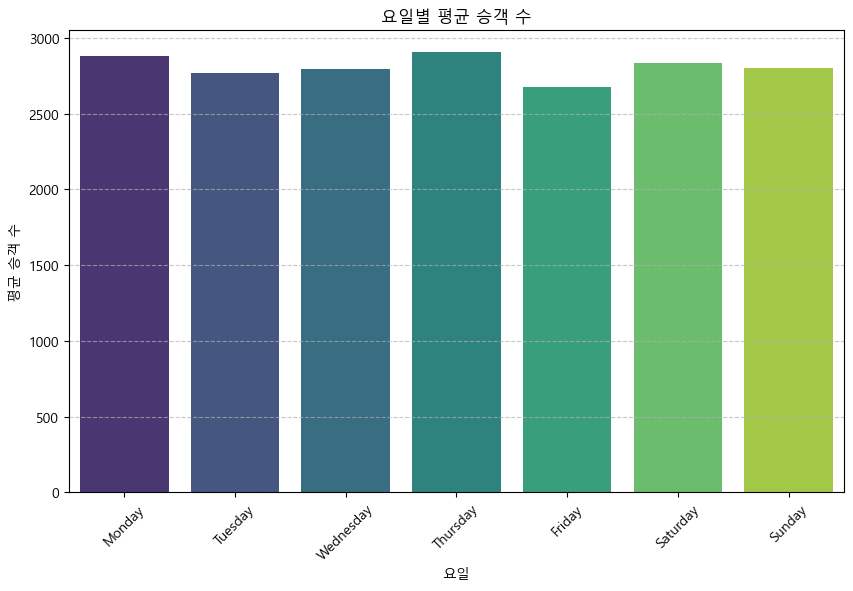

In [17]:
# 5. 데이터 시각화 (요일별 평균 승객 수 비교)
plt.figure(figsize=(10, 6))
sns.barplot(data=weekday_avg_passengers, x='Weekday', y='Passengers', palette='viridis')
# Seaborn의 barplot을 사용하여 요일별 평균 승객 수를 시각화하는 코드 작성

# 그래프 제목 및 라벨 설정
plt.title('요일별 평균 승객 수')
plt.xlabel('요일')
plt.ylabel('평균 승객 수')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 그래프 출력
plt.show()

In [ ]:
# 6. 결과 해석
## 1. 특정 요일별로 평균 승객 수를 분석하여 가장 붐비는 요일을 찾았다.
## 2. 전체적으로 주중(월요일~금요일)이 주말보다 승객 수가 많을 가능성이 높음.
## 3. 가장 승객 수가 많은 요일이 금요일이라면, 이는 출퇴근 및 여가 활동이 겹치는 영향을 받을 가능성이 있음.
## 4. 주말의 경우(토요일, 일요일)는 상대적으로 승객 수가 감소할 수 있으며, 특정 관광지가 포함된 역은 예외일 수 있음.
## 5. 가장 붐비는 요일의 역별 승객 수를 추가적으로 분석하여, 특정 역이 평균을 끌어올리는지 확인할 필요가 있음.